<a href="https://colab.research.google.com/github/s-ahmed6786/Deep-Learning/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

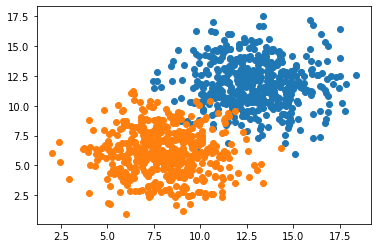

In [ ]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
              np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
              np.random.normal(6, 2, n_pts)]).T
 
X = np.vstack((Xa, Xb))
Y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
 
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])



In [ ]:
model = Sequential()
model.add(Dense(units = 1, input_shape = (2,), activation = 'sigmoid'))
adam = Adam(lr = 0.1)
model.compile(adam, loss = 'binary_crossentropy', metrics = ['accuracy'])
h = model.fit(x=X, y = Y, verbose = 1, batch_size = 50, epochs = 500, shuffle = 'true')

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/500
20/20 [==============================] - 4s 38ms/step - loss: 1.9651 - accuracy: 0.4920
Epoch 2/500
20/20 [==============================] - 1s 47ms/step - loss: 0.6607 - accuracy: 0.5960
Epoch 3/500
20/20 [==============================] - 1s 33ms/step - loss: 0.4375 - accuracy: 0.8820
Epoch 4/500
20/20 [==============================] - 1s 26ms/step - loss: 0.3775 - accuracy: 0.9030
Epoch 5/500
20/20 [==============================] - 0s 16ms/step - loss: 0.3363 - accuracy: 0.9220
Epoch 6/500
20/20 [==============================] - 0s 5ms/step - loss: 0.3073 - accuracy: 0.9280
Epoch 7/500
20/20 [==============================] - 0s 12ms/step - loss: 0.2782 - accuracy: 0.9410
Epoch 8/500
20/20 [==============================] - 0s 8ms/step - loss: 0.2567 - accuracy: 0.9430
Epoch 9/500
20/20 [==============================] - 0s 25ms/step - loss: 0.2431 - accuracy: 0.9490
Epoch 10/500
20/20 [==============================] - 0s 13ms/step - loss: 0.2248 - accuracy: 0.9530
E

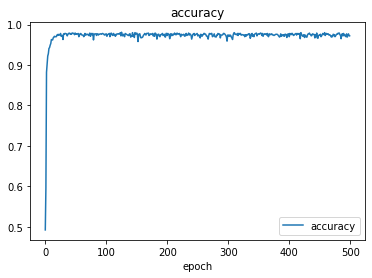

In [ ]:
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

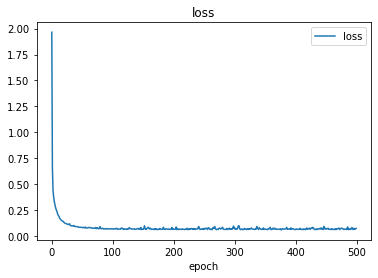

In [ ]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [ ]:
def plot_decision_boundary(X, Y, model):
  x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
  y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
  xx, yy = np.meshgrid(x_span, y_span)
  xx_, yy_ = xx.ravel(), yy.ravel()
  grid = np.c_[xx_, yy_]
  pred_func = model.predict(grid)
  z = pred_func.reshape(xx.shape)
  plt.contourf(xx, yy, z)

79/79 [==============================] - 0s 980us/step


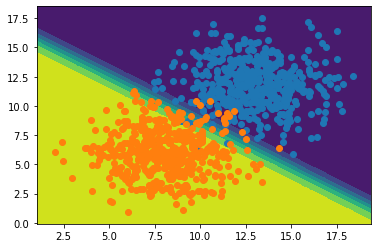

In [ ]:
plot_decision_boundary(X, Y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

1/1 [==============================] - 0s 13ms/step
Prediction is:  [[0.9999797]]


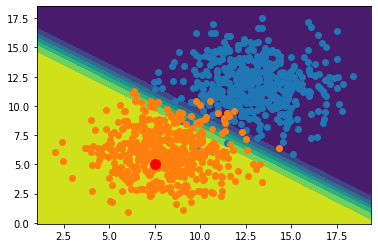

In [ ]:
plot_decision_boundary(X, Y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 7.5
y = 5
point = np.array([[x,y]])
prediction = model.predict(point)
plt.plot([x],[y], marker = "o", markersize = 10, color = "red")
print("Prediction is: ", prediction)